Calculating the mass of contaminants in input and output files for the Salish Sea Atlantis Model.

In [1]:
import os
import sys
import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd
from netCDF4 import Dataset
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.path.append('/ocean/rlovindeer/MOAD/analysis-raisha/notebooks/')
import ssam_groups as groups

In [2]:
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df_original = gpd.read_file(shapefile_name)
data_df_original = data_df_original.sort_values(by=['BOX_ID'])
data_df = data_df_original.set_index('BOX_ID')
box_depth = data_df['BOTZ']
box_area = data_df['AREA']
box_volume = box_area * box_depth
surface_volume = box_area * 25
num_boxes = data_df.shape[0]
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]
land_df = data_df.loc[land_boxes]

#print(box_volume)

In [3]:
# Ocean Parcels Spill File
OP_FileName = '5b_TurnPoint_Dilbit_2019-01-14_OP_D50_wp3.nc'
inputfile = 'SSAM_Scenario_5b_2019-01-14_100_newboxid.nc'
#input = xr.open_dataset(str(inputfile))
num_particles = 100

In [7]:
#input_nc = Dataset(inputfile,'r')
#input_nc = pd.DataFrame(inputfile)
input_nc = xr.open_dataset(str(inputfile))
input_nc = input_nc.fillna(0)
masses = np.zeros((num_boxes))

for pah in groups.pahs:
    pelagic_oiled = np.ma.filled(input_nc.variables[pah][1,:,0:6], np.nan) # tonnes
    
    pelagic_oiled = pelagic_oiled.sum(axis=1)

    for box in range(0, num_boxes):
        pelagic_mass = pelagic_oiled[box] * surface_volume[box]
        masses[box] = pelagic_mass   
    pah_end_mass = masses.sum(axis=0) 
    data_df[str(pah)] = masses
    print(pah, pah_end_mass)


Phenanthrene 30635057.618396368
Benzo 5406186.638540536
Naphthalene 43249493.10832429
Pyrene 18020622.128468454


In [8]:
input_nc

<xarray.Dataset>
Dimensions:       (t: 17, b: 130, z: 7)
Coordinates:
  * t             (t) datetime64[ns] 2019-01-14T00:30:00 ... 2019-01-22T00:03:20
Dimensions without coordinates: b, z
Data variables:
    oil           (t, b) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Naphthalene   (t, b, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Phenanthrene  (t, b, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Pyrene        (t, b, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Benzo         (t, b, z) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

input_naph = input_nc.variables['Naphthalene'][1,:,:]
input_naph = input_naph.sum(axis=1)
input_nc.close()
input_naph

In [4]:
scenario = inputFileName.split(sep = '_')

In [5]:
# Oil type properties & spill location selection

Dilbit = {
    "Density": 1011.2, #kg/m^3
    "Naphthalene": 24, #mg/kg oil
    "Phenanthrene": 17,
    "Pyrene": 10,
    "Benzo": 3,
}

BunkerC = {
    "Density": 995.3,
    "Naphthalene": 680,
    "Phenanthrene": 796,
    "Pyrene": 266,
    "Benzo": 56,
}

Diesel = {
    "Density": 831.0,
    "Naphthalene": 3664,
    "Phenanthrene": 1000,
    "Pyrene": 0.000,
    "Benzo": 0.000,
}

Crude = {
    "Density": 884.7,
    "Naphthalene": 654,
    "Phenanthrene": 327,
    "Pyrene": 13,
    "Benzo": 2,
}

fuel_type = {
    "Dilbit" : Dilbit,
    "BunkerC" : BunkerC,
    "Diesel" : Diesel,
    "Crude" : Crude,
}

spill_volume = {
    "5b" : 2000, #m^3 
    "6a" : 15,
    "7a" : 1000,
    "4a" : 500,
}

spill_box_surface_volume = {
    "5b" : (322271112.331102*25), #m^3 
    "6a" : 15,
    "7a" : 1000,
    "4a" : 500,
}

In [6]:
# Calculations of oil mass in SSAM_Scenario_5b
oil_mass_kg = (fuel_type[scenario[2]]["Density"] * spill_volume[scenario[0]])
naph_mass_mg = oil_mass_kg * fuel_type[scenario[2]]["Naphthalene"]
phen_mass_mg = oil_mass_kg * fuel_type[scenario[2]]["Phenanthrene"]
pyrene_mass_mg = oil_mass_kg * fuel_type[scenario[2]]["Pyrene"]
benzo_mass_mg = oil_mass_kg * fuel_type[scenario[2]]["Benzo"]
oil_mass_mg = oil_mass_kg * 1e6

print(str(scenario[2])+' spill mass of '+str(oil_mass_mg)+' in mg')
print('Naphthalene spill mass of '+str(naph_mass_mg)+' in mg')
print('Phenanthrene spill mass of '+str(phen_mass_mg)+' in mg')
print('Pyrene spill mass of '+str(pyrene_mass_mg)+' in mg')
print('Benzo spill mass of '+str(benzo_mass_mg)+' in mg')

Dilbit spill mass of 2022400000000.0 in mg
Naphthalene spill mass of 48537600.0 in mg
Phenanthrene spill mass of 34380800.0 in mg
Pyrene spill mass of 20224000.0 in mg
Benzo spill mass of 6067200.0 in mg


With no biological uptake

In [38]:
output_file_path = '/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_v6691_nobiouptake/outputSalishSea.nc'
output = xr.open_dataset(str(output_file_path), decode_cf=True)

In [39]:
output_nc = output.fillna(0)

In [10]:
time = np.ma.filled(output.variables['t'], np.nan)
end = time.size-1

In [21]:
def plot_pah(scenario, times):
    fig, ax = plt.subplots(figsize = (14,3))
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)

        ax.plot(times, contam_mass_t[0:times.size])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')

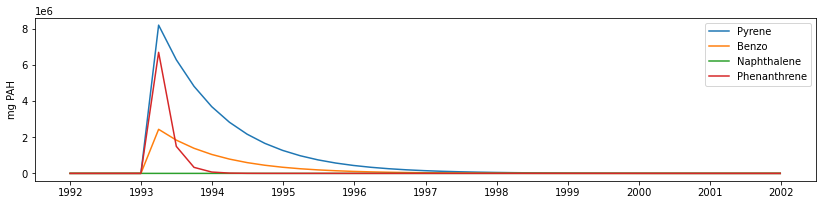

In [22]:
plot_pah(output, time)

With no biological uptake, the rate of contaminant decay matches that of the contaminant half-life. 
Note, however, that no zeroing out of the contaminant occures in the water column, even though a zero file is set as a reset value as the last contaminant input file.

In [24]:
def plot_pah_2(scenario, times):
    fig, ax = plt.subplots(figsize = (14,3))
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)

        ax.plot(times, contam_mass_t[0:times.size])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')

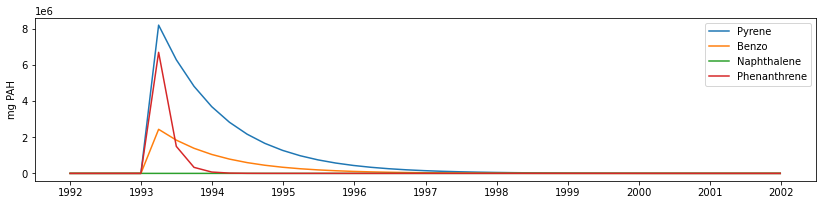

In [25]:
plot_pah_2(output, time)

In [19]:
def calculate_pah_mass(pah, t, scenario):

    oil = np.ma.filled(scenario.variables[pah][t,:,0:6], np.nan) # tonnes
    volume = np.ma.filled(scenario.variables['volume'][t,:,0:6], np.nan)
    oil_mass_bl = oil * volume
    oil_mass_b = oil_mass_bl.sum(axis=1)
    oil_mass = oil_mass_b.sum(axis=0)
    name = str(pah) +'_time_'+ str(t)
    data_df[name] = oil_mass_b
    print(pah, oil_mass)

    data_df.loc[land_boxes, name] = 0
    _cmap = cm.Oranges
    ax = plt.figure()
    ax = data_df.plot(column = name, cmap=_cmap,
        legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
        )
    ax.set_title((str(pah)+' at '+str(time[t])[:10]), fontsize = 12)
    data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
    land_df.plot(ax=ax, color='white')
    return

Pyrene 8187623.727344489
Benzo 2433857.2827744037
Naphthalene 137.85500472219795
Phenanthrene 6685326.777329157


<Figure size 432x288 with 0 Axes>

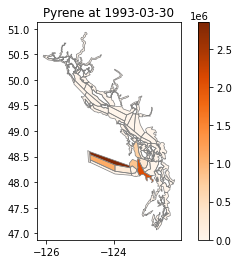

<Figure size 432x288 with 0 Axes>

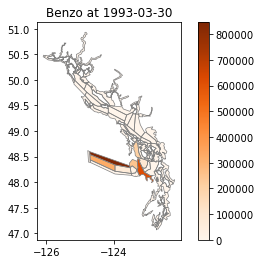

<Figure size 432x288 with 0 Axes>

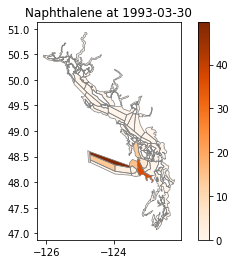

<Figure size 432x288 with 0 Axes>

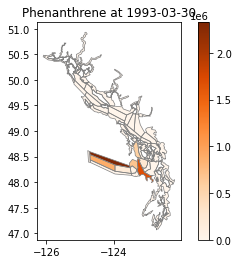

In [18]:
for pah in groups.pahs:
    calculate_pah_mass(pah, 5, output)

Previous calculation

In [16]:
for pah in groups.pahs:
    calculate_pah_mass(pah, end, output)

Phenanthrene 8.417190846795313e-17
Benzo 123.30308008598728
Naphthalene 6.784379093366334e-308
Pyrene 713.4294258606149


New calculation

Pyrene 716.1692508438755
Benzo 123.77661600761526
Naphthalene 6.795865174408886e-308
Phenanthrene 8.44958000932676e-17


<Figure size 432x288 with 0 Axes>

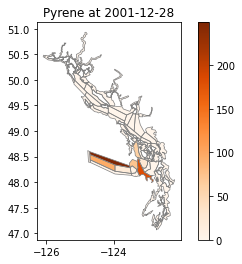

<Figure size 432x288 with 0 Axes>

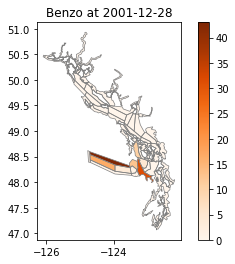

<Figure size 432x288 with 0 Axes>

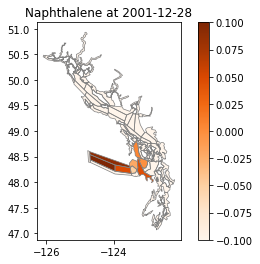

<Figure size 432x288 with 0 Axes>

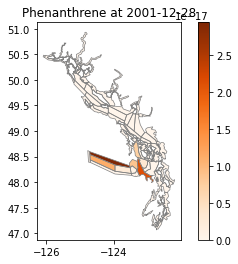

In [20]:
end = time.size-1
for pah in groups.pahs:
    calculate_pah_mass(pah, end, output)